In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from funcs_model_fit_evaluate import *
from funcs_model_predictions import *

from utils_dataset import *
from utils_sampling import *
from utils_models import *

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
plt.rcParams.update({'font.size': 28})
plt.rcParams.update({'font.family': 'arial'})

### Compare state representation models

In [3]:
datasetName = 'takahashi2016roesch2009burton2018Valid' # ,'initialTrainingValid'
data = pd.read_csv('data/' + datasetName + '.csv')

modelList = ['fourState_full', 'sixState_full', 'hybridValue_full', 'hybridLearning_full']
baselineModel = 'sixState_full'
modelNames = {
    'sixState_full': 'Six-state',
    'fourState_full': 'Four-state',
    'hybridLearning_full': 'Hybrid-learning', 
    'hybridValue_full': 'Hybrid-value',
}

#### Calculate WAIC difference from model fits (the following cell may take a few minutes to run)

In [4]:
metrics_group, waicDiff_rat_perTrial, waicDiff_rat_perTrial_se = calculate_likelihood(datasetName, data, baselineModel, modelList)

#### Model comparison (WAIC) figure

,fourState_full,sixState_full,hybridValue_full,hybridLearning_full
waicDiff,1211.398557,0.0,-133.814735,-53.019753
waicDiff_se,78.425047,0.0,24.100317,16.830385


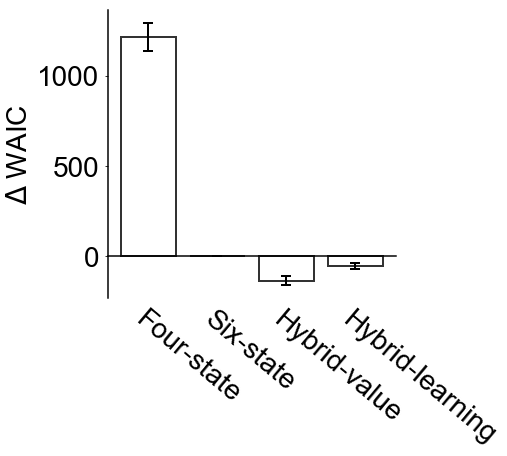

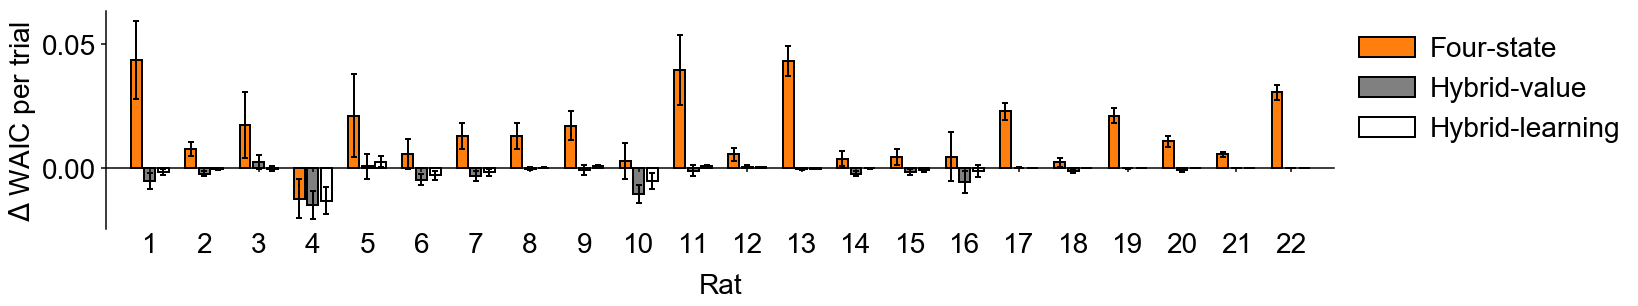

In [5]:
colors_group = {
    'sixState_full':'w',
    'fourState_full':'w',
    'hybridValue_full': 'w',
    'hybridLearning_full':'w'
}

colors_individual = {
    'sixState_full': 'C2',
    'fourState_full': 'C1',
    'hybridValue_full': 'gray',
    'hybridLearning_full':'w'
}

# for the entire group
fig, ax = plt.subplots(figsize=(4,4))
display(metrics_group[modelList])

iM = 0
for model in modelList:
    ax.bar(x=iM, height=metrics_group.loc['waicDiff', model], alpha=0.8, edgecolor='k', lineWidth=2, color=colors_group[model])
    ax.errorbar(x=iM, y=metrics_group.loc['waicDiff', model], yerr=metrics_group.loc['waicDiff_se', model], ecolor='k', fmt='None', capsize=5, label=None, elinewidth=2, markeredgewidth=2)
    iM += 1
ax.set_xticks(np.arange(len(modelList))-0.25)
ax.set_xlabel('', fontsize=28)
ax.set_ylabel(r'$\Delta$ WAIC', fontsize=28)
ax.tick_params(axis='both', pad=5, labelsize=28)
ax.tick_params(axis='x', length=0)
sns.despine()
ax.spines['bottom'].set_position('zero')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(axis='x', pad=50)
ax.set_xticklabels([modelNames[model] for model in modelList], rotation=-40, horizontalalignment='left')
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
plt.show()


# per animal
fig, ax = plt.subplots(figsize=(5.5*(len(modelList)),4))
NRats = data['rat'].unique().size
x = np.arange(NRats)+1
deltax = np.linspace(0,1,len(modelList)-1)*0.5-0.25 #[-0.3, 0, 0.3]
barwidth = 0.2*3/(len(modelList)-1)
iM = 0
for model in modelList:
    waicDiff = waicDiff_rat_perTrial[model].values
    waicDiff_se = waicDiff_rat_perTrial_se[model].values
    if 'sixState' not in model:
        ax.bar(x+deltax[iM], height=[waicDiff[r] for r in ratOrder], width=barwidth, edgecolor='k', align='center', lineWidth=2, color=colors_individual[model], label=modelNames[model])
        ax.errorbar(x=x+deltax[iM], y=[waicDiff[r] for r in ratOrder], yerr=[waicDiff_se[r] for r in ratOrder], ecolor='k', fmt='None', capsize=3, label='', elinewidth=2, markeredgewidth=2)
        iM += 1
ax.set_xticks(x)
ax.set_xlabel('Rat')
ax.set_ylabel(r'$\Delta$ WAIC per trial')
ax.spines['bottom'].set_position('zero')
sns.despine()
ax.xaxis.labelpad = 15
ax.tick_params(axis='x', width=1.5, pad=15)
ax.tick_params(axis='x', pad=60)
ax.tick_params(axis='y', width=1.5, length=5, pad=5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.set(xlim=[0.2, NRats+0.8])
ax.legend(frameon=False, handletextpad=0.5, bbox_to_anchor=(1, 1))
plt.show()

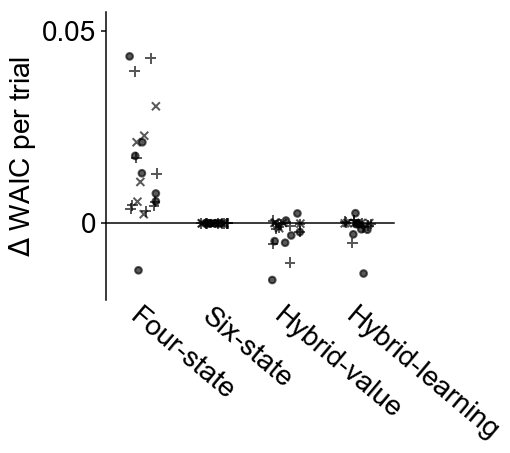

In [6]:
# jitterred scatter plot for individual delta WAIC per trial
waicdiff = pd.melt(waicDiff_rat_perTrial, id_vars=['rat'], value_vars=modelList, var_name='model', value_name='waicDiff_rat_perTrial')
fig, ax = plt.subplots(figsize=(4,4))
for dataset in datasets:
    sns.stripplot(x='model', y='waicDiff_rat_perTrial', data=waicdiff[waicdiff['rat'].isin(dataset2rat[dataset])], linewidth=2,
                  ax=ax, jitter=0.2, color='black', alpha=.65, size=8*ratio_s[dataset], marker=dataset2marker[dataset], label=dataset_labels[dataset])
sns.despine()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_position('zero')
ax.tick_params(axis='x', length=0, width=1.5, pad=80)
ax.tick_params(axis='y', width=1.5, length=5, pad=5)
ax.set_xticks(np.arange(len(modelList))-0.25)
ax.set(yticks=[0, 0.05],yticklabels=[0,0.05])
ax.set_ylim([-0.02,0.055])
ax.set_xticklabels([modelNames[model] for model in modelList], rotation=-40, horizontalalignment='left')
ax.set_xlabel('')
ax.set_ylabel(r'$\Delta$ WAIC per trial')
fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
plt.show()